# Desarrollo de una estrategia sencilla para PyRatPack

## Preparación de las herramientas y datos

Comenzamos importando los modulos que vamos a usar. En este caso usaremos **pandas**, **numpy** y **matplotlib**.
Tambien importaremos como si de un módulo se tratara el archivo **pyratpack_tools.py** que habremos guardado en el mismo directorio que este notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['figure.figsize']=20,10

import pyratpack_tools as tools


Vamos a cargar los datos de las cotizaciones de los activos que vamos a usar en la cartera. El archivo **data_sistemas.pkl** debera estar en el mismo directorio que este notebook, de lo contrario deberemos añadirle el path hasta el archivo.

Se trata de un archivo pickle de Python, por lo que no solo cargaremos los datos, tambien la estructura del dataframe de pandas que los contiene. Para simplificar un poco, solo usaremos los datos desde la fecha en que hay datos de los 20 activos que estudiamos, para ello usamos *dropna()*.

In [6]:
data = pd.read_pickle('data_sistemas.pkl').dropna()

In [47]:
data.Close.tail(7)

AES    AIG    ALK   ARNC     BXP    COG    EQR     FE    FLR  \
Date                                                                         
2018-10-16  15.36  49.30  63.86  22.19  118.02  23.90  64.38  37.80  46.87   
2018-10-17  15.08  49.62  64.49  22.52  117.52  23.80  64.07  37.92  46.74   
2018-10-18  14.80  48.61  62.37  22.03  116.48  23.59  64.41  38.06  46.79   
2018-10-19  14.98  47.20  62.58  21.88  116.95  23.97  64.87  38.85  46.66   
2018-10-22  15.01  44.96  63.54  21.45  115.01  23.16  63.54  38.62  46.22   
2018-10-23  14.72  44.18  62.99  20.65  115.24  22.74  63.74  38.24  44.98   
2018-10-24  14.67  42.23  61.11  19.87  115.54  21.18  65.43  38.71  42.61   

               GPC     GT     HP        IBM   INCY    LEG   MDLZ    OXY  \
Date                                                                      
2018-10-16   97.06  21.63  69.19  145.12000  64.91  39.67  41.28  73.12   
2018-10-17   95.14  21.45  68.05  134.05000  65.04  39.23  41.16  72.92   
2018-10-18  100.82  20.43  66.41  130.55000  64.44  38.61  41.04  71.90   
2018-10-19  101.34  20.27  66.15  129.10001  66.06  38.28  41.80  72.18   
2018-10-22  100.79  20.14  65.39  130.02000  65.18  38.16  41.44  72.29   
2018-10-23  100.57  20.71  62.88  131.21001  65.04  38.46  41.26  70.64   
2018-10-24   99.56  19.81  60.39  127.21000  60.92  37.60  41.32  68.23   

             SBUX     UHS     WU  
Date                              
2018-10-16  57.81  124.62  18.40  
2018-10-17  59.10  125.64  18.42  
2018-10-18  58.64  126.38  18.34  
2018-10-19  58.66  125.79  18.18  
2018-10-22  58.90  126.19  18.01  
2018-10-23  58.81  125.55  17.94  
2018-10-24  58.06  122.02  17.67

---


## Desarrollo de la estrategia

Definimos un periodo que usaremos para tomar una ventana de desplazamiento el que calcularemos la media y la desviación  tipica.

In [48]:
period = 30
media = data.Close.pct_change().rolling(period).mean()
std = data.Close.pct_change().rolling(period).std()

Para este ejemplo vamos a considerar que los rendimientos del activo libre de riesgo es cero, por simplificar, de modo que el valor del ratio de Sharpe diario será la división de la media entre la desviación típica.

De los sharpe calculados solo tomamos aquellos positivos, pasando a cero el valor de los negativos.

In [49]:
sharpe = media / std
sharpe_positivo = sharpe.dropna().where(sharpe>0,0)

In [58]:
sharpe_positivo.to_weights().tail()

AES  AIG  ALK      ARNC  BXP       COG  EQR        FE  FLR  \
Date                                                                          
2018-10-18  0.342312  0.0  0.0  0.023763  0.0  0.199932  0.0  0.016826  0.0   
2018-10-19  0.356297  0.0  0.0  0.009721  0.0  0.206076  0.0  0.107852  0.0   
2018-10-22  0.423084  0.0  0.0  0.000000  0.0  0.153089  0.0  0.054759  0.0   
2018-10-23  0.483436  0.0  0.0  0.000000  0.0  0.123478  0.0  0.041271  0.0   
2018-10-24  0.541551  0.0  0.0  0.000000  0.0  0.000000  0.0  0.158651  0.0   

                 GPC   GT        HP  IBM  INCY  LEG  MDLZ  OXY      SBUX  \
Date                                                                       
2018-10-18  0.000000  0.0  0.160148  0.0   0.0  0.0   0.0  0.0  0.257020   
2018-10-19  0.006463  0.0  0.128630  0.0   0.0  0.0   0.0  0.0  0.184962   
2018-10-22  0.000000  0.0  0.100323  0.0   0.0  0.0   0.0  0.0  0.237053   
2018-10-23  0.000000  0.0  0.000000  0.0   0.0  0.0   0.0  0.0  0.281127   
2018-10-24  0.000000  0.0  0.000000  0.0   0.0  0.0   0.0  0.0  0.299798   

                 UHS   WU  
Date                       
2018-10-18  0.000000  0.0  
2018-10-19  0.000000  0.0  
2018-10-22  0.031692  0.0  
2018-10-23  0.070688  0.0  
2018-10-24  0.000000  0.0

Vamos a calcular los pesos de forma que se reparta todo el capital en cada rebalanceo entre los activos que tengan Sharpe positivo, y lo hará de forma proporcional es decir invirtiendo mas en aquellos con Sharpe mas alto.

Para ello basta con usar la función **to_pyratpack** de *pyratpack_tools*. A esta función le pasamos data y los valores de Sharpe positivo que hemos calculado. Usamos *dropna=True* para descartar los periodos en los que no hay datos de todos los activos.

Esta función nos devuelve los pesos normalizados calculados a partir de los valores de los Sharpe, y los retornos semanales en base a esos pesos según el rebalanceo de PyRatPack. 

Ademas por defecto grafica la equity de la estrategía contra el benchmark (que se calcula como una cartera equidistribuida de buy and hold), así el drawdown de ambas y por úlimo la evolción de cada uno de los activos según los pesos.

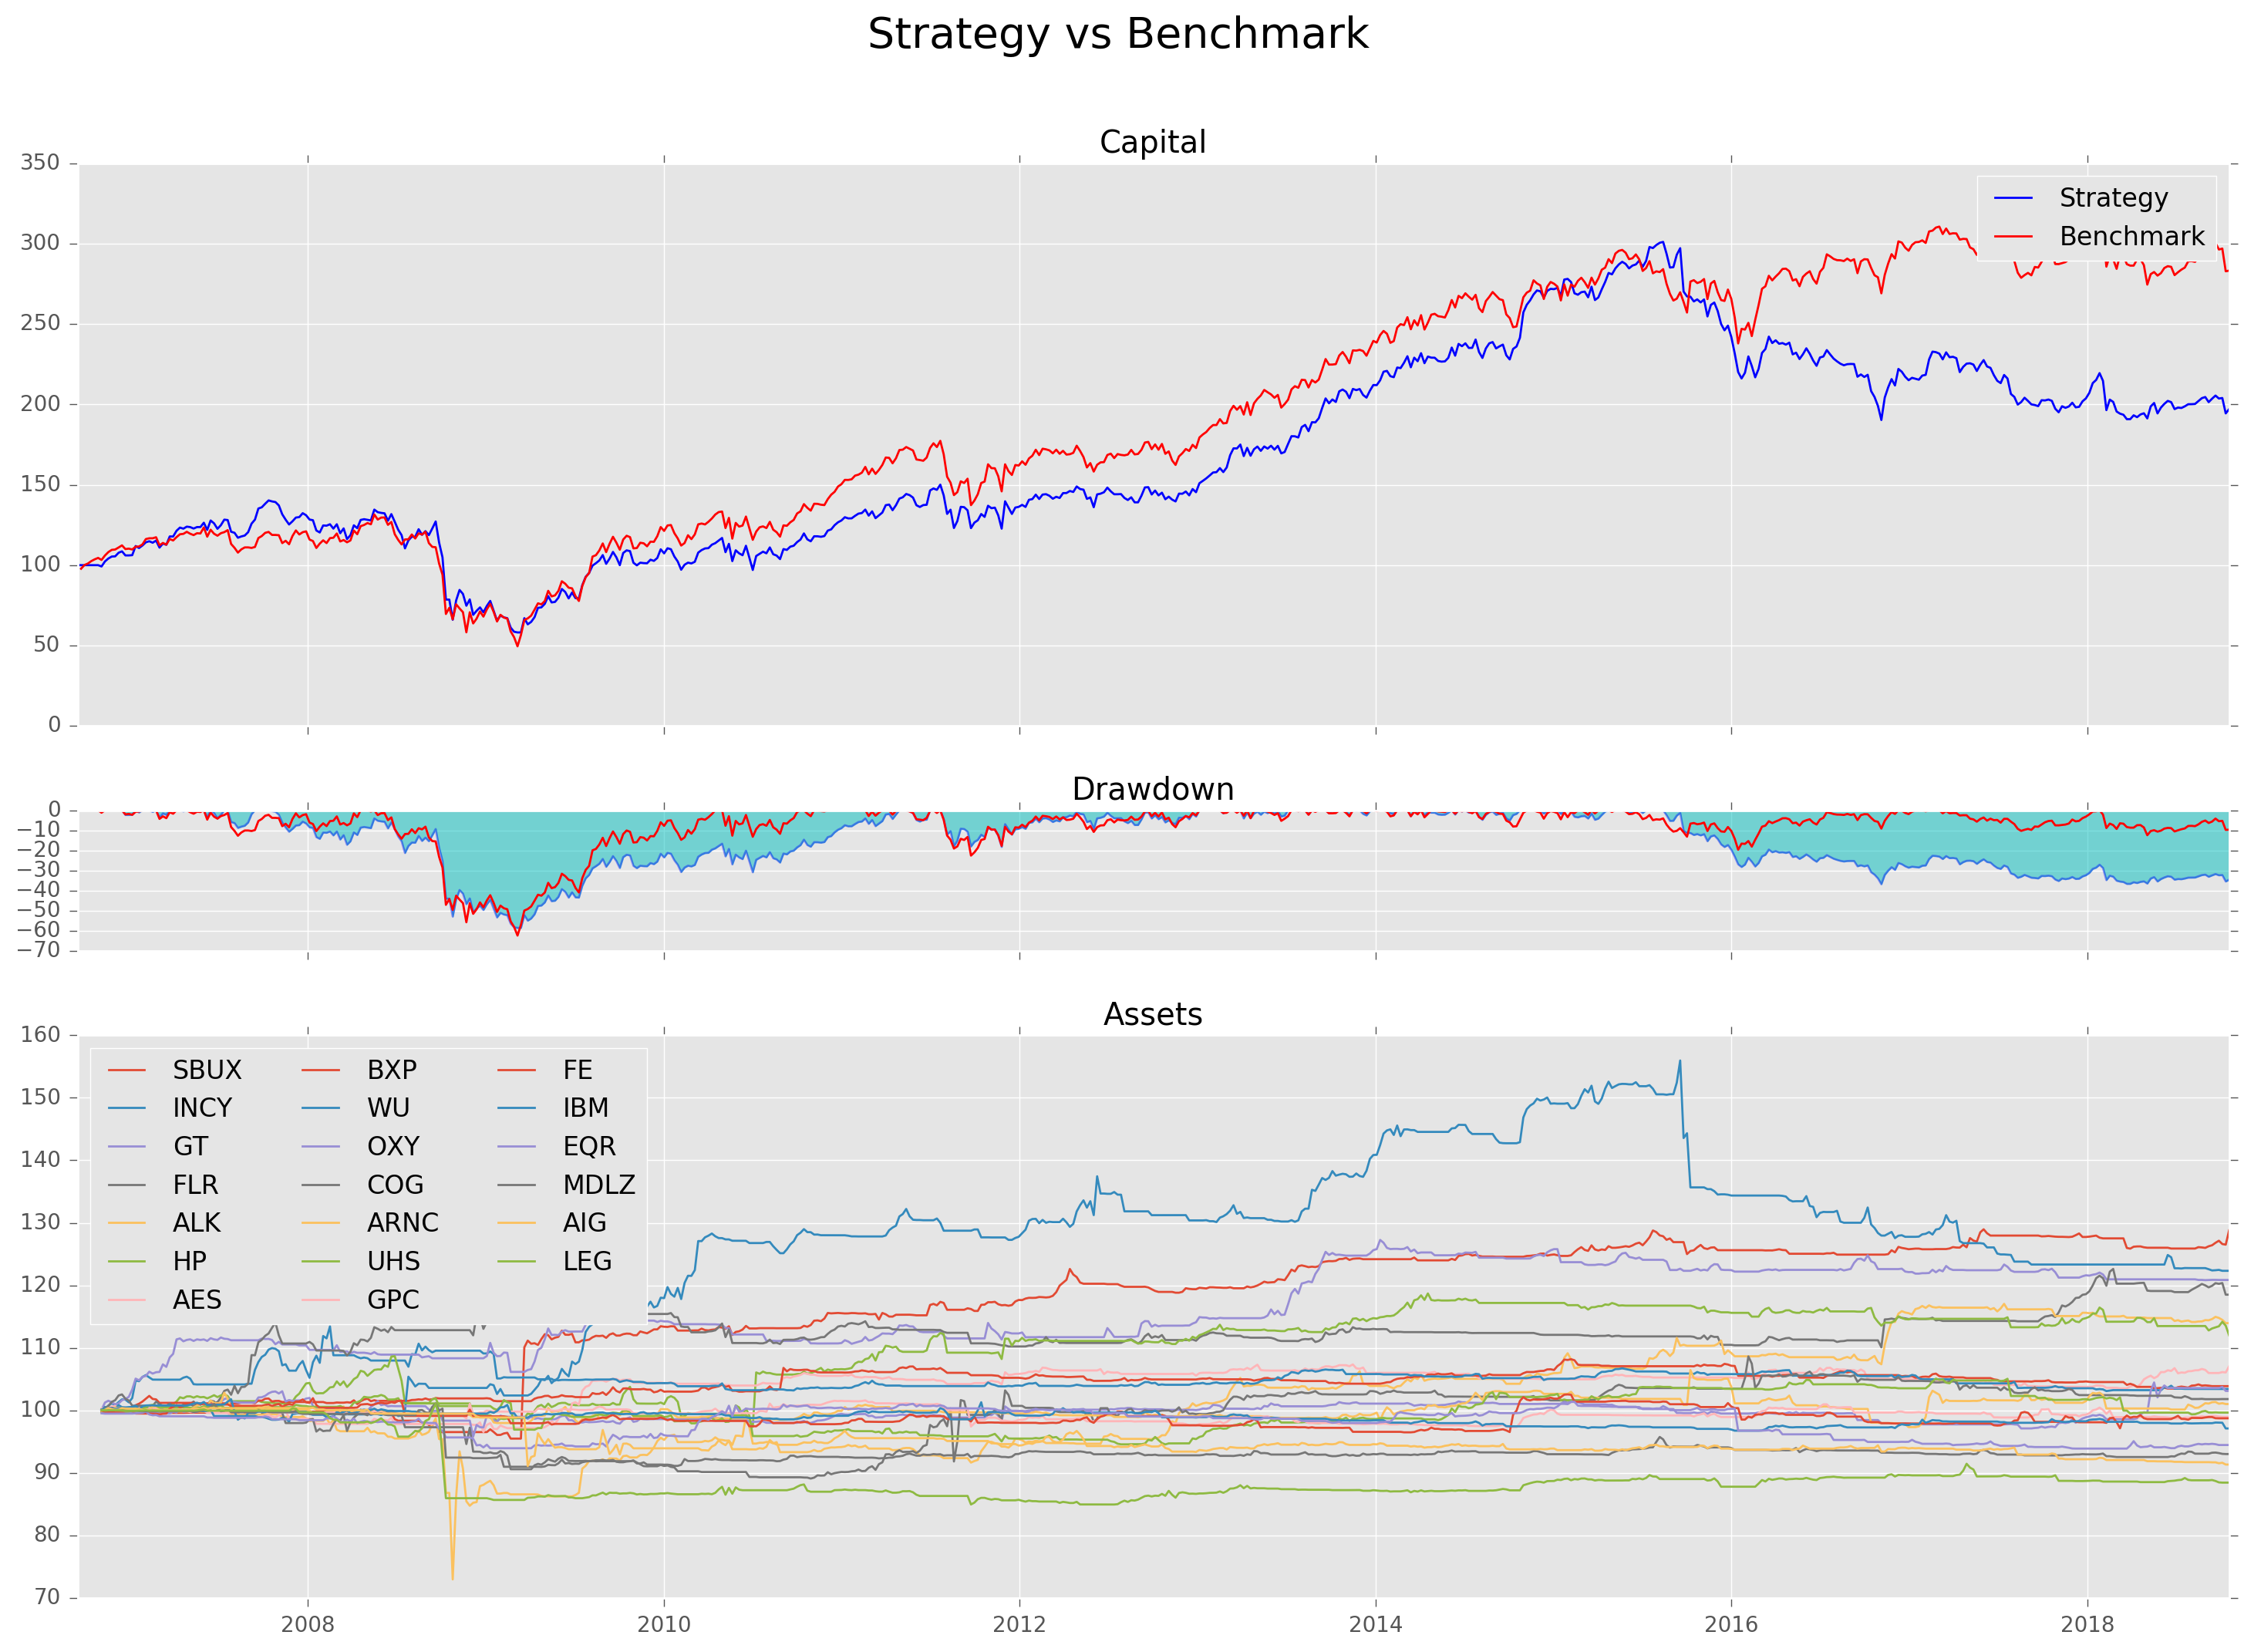

In [59]:
weights, returns = tools.to_pyratpack(data, sharpe_positivo, plot=True)

Podemos verificar que los pesos usados son correctos (positivos y suma por fecha entre cero y uno) usando la función **check_weights** de *pyratpack_tools*.

In [62]:
weights.tail()

AES       AIG       ALK      ARNC  BXP       COG       EQR  \
Date                                                                          
2018-09-21  0.000000  0.060913  0.098215  0.081929  0.0  0.000000  0.040612   
2018-09-28  0.021523  0.044923  0.085242  0.068259  0.0  0.003231  0.000000   
2018-10-05  0.075932  0.048538  0.058797  0.059985  0.0  0.000000  0.000000   
2018-10-12  0.319784  0.000000  0.000000  0.000000  0.0  0.000000  0.000000   
2018-10-19  0.342312  0.000000  0.000000  0.023763  0.0  0.199932  0.000000   

                  FE       FLR       GPC        GT        HP       IBM  \
Date                                                                     
2018-09-21  0.041779  0.070652  0.045599  0.002056  0.077710  0.059554   
2018-09-28  0.000000  0.100646  0.035213  0.000000  0.141027  0.114449   
2018-10-05  0.043185  0.076219  0.000000  0.000000  0.192745  0.144134   
2018-10-12  0.000000  0.000000  0.000000  0.000000  0.305071  0.000000   
2018-10-19  0.016826  0.000000  0.000000  0.000000  0.160148  0.000000   

                INCY       LEG      MDLZ       OXY      SBUX       UHS      WU  
Date                                                                            
2018-09-21  0.067965  0.061033  0.060961  0.000000  0.176670  0.054352  0.0000  
2018-09-28  0.033008  0.014619  0.055827  0.096381  0.165566  0.014485  0.0056  
2018-10-05  0.000000  0.000000  0.011107  0.105719  0.183639  0.000000  0.0000  
2018-10-12  0.000000  0.000000  0.000000  0.000000  0.375145  0.000000  0.0000  
2018-10-19  0.000000  0.000000  0.000000  0.000000  0.257020  0.000000  0.0000

In [60]:
weights.check_weights()

'Comprobacion Ok. Pesos aceptables.'

Otra función util de las herramientas es **return_distribution**, donde podemos ver tanto númerica como gráficamente la aportación de cada activo al resultado final.

In [63]:
returns.return_bars()

Tambien podemos usarla para ver el peso global asignado a cada activo.

In [68]:
weights.return_bars()

La función **retun_blocks** nos muestra lo mismo de manera aún mas gráfica.

---

## Optimización de la estrategia

Para realizar la optimización de la estrategia vamos a definirla como una función, donde los parametros de entrada son los datos de cotización diario y el periodo de la ventana rodante. Devolviendo los retornos calculados para esos parametros.

In [69]:
def sharpe_strategy (data, period = 30):
    media = data.Close.pct_change().rolling(period).mean()
    std = data.Close.pct_change().rolling(period).std()
    sharpe = media / std
    peso = sharpe.dropna().where(sharpe>0,0)
    weights, returns = tools.to_pyratpack(data, peso, dropna=True, plot=False)
    
    return returns
    

Para realizar los calculos de la estrategia con un rango de periodos vamos a definir primero dicho rango, y usaremos la función **grid_backtests** de *pyratpack_tools* para realizar el trabajo, pasando como parametros los datos de cotización originales, la función que contiene la estrategia y el rango de periodos.

Esta función nos devuelve un dataframe multiindices de pandas con los retornos de la estrategia para cada periodo.

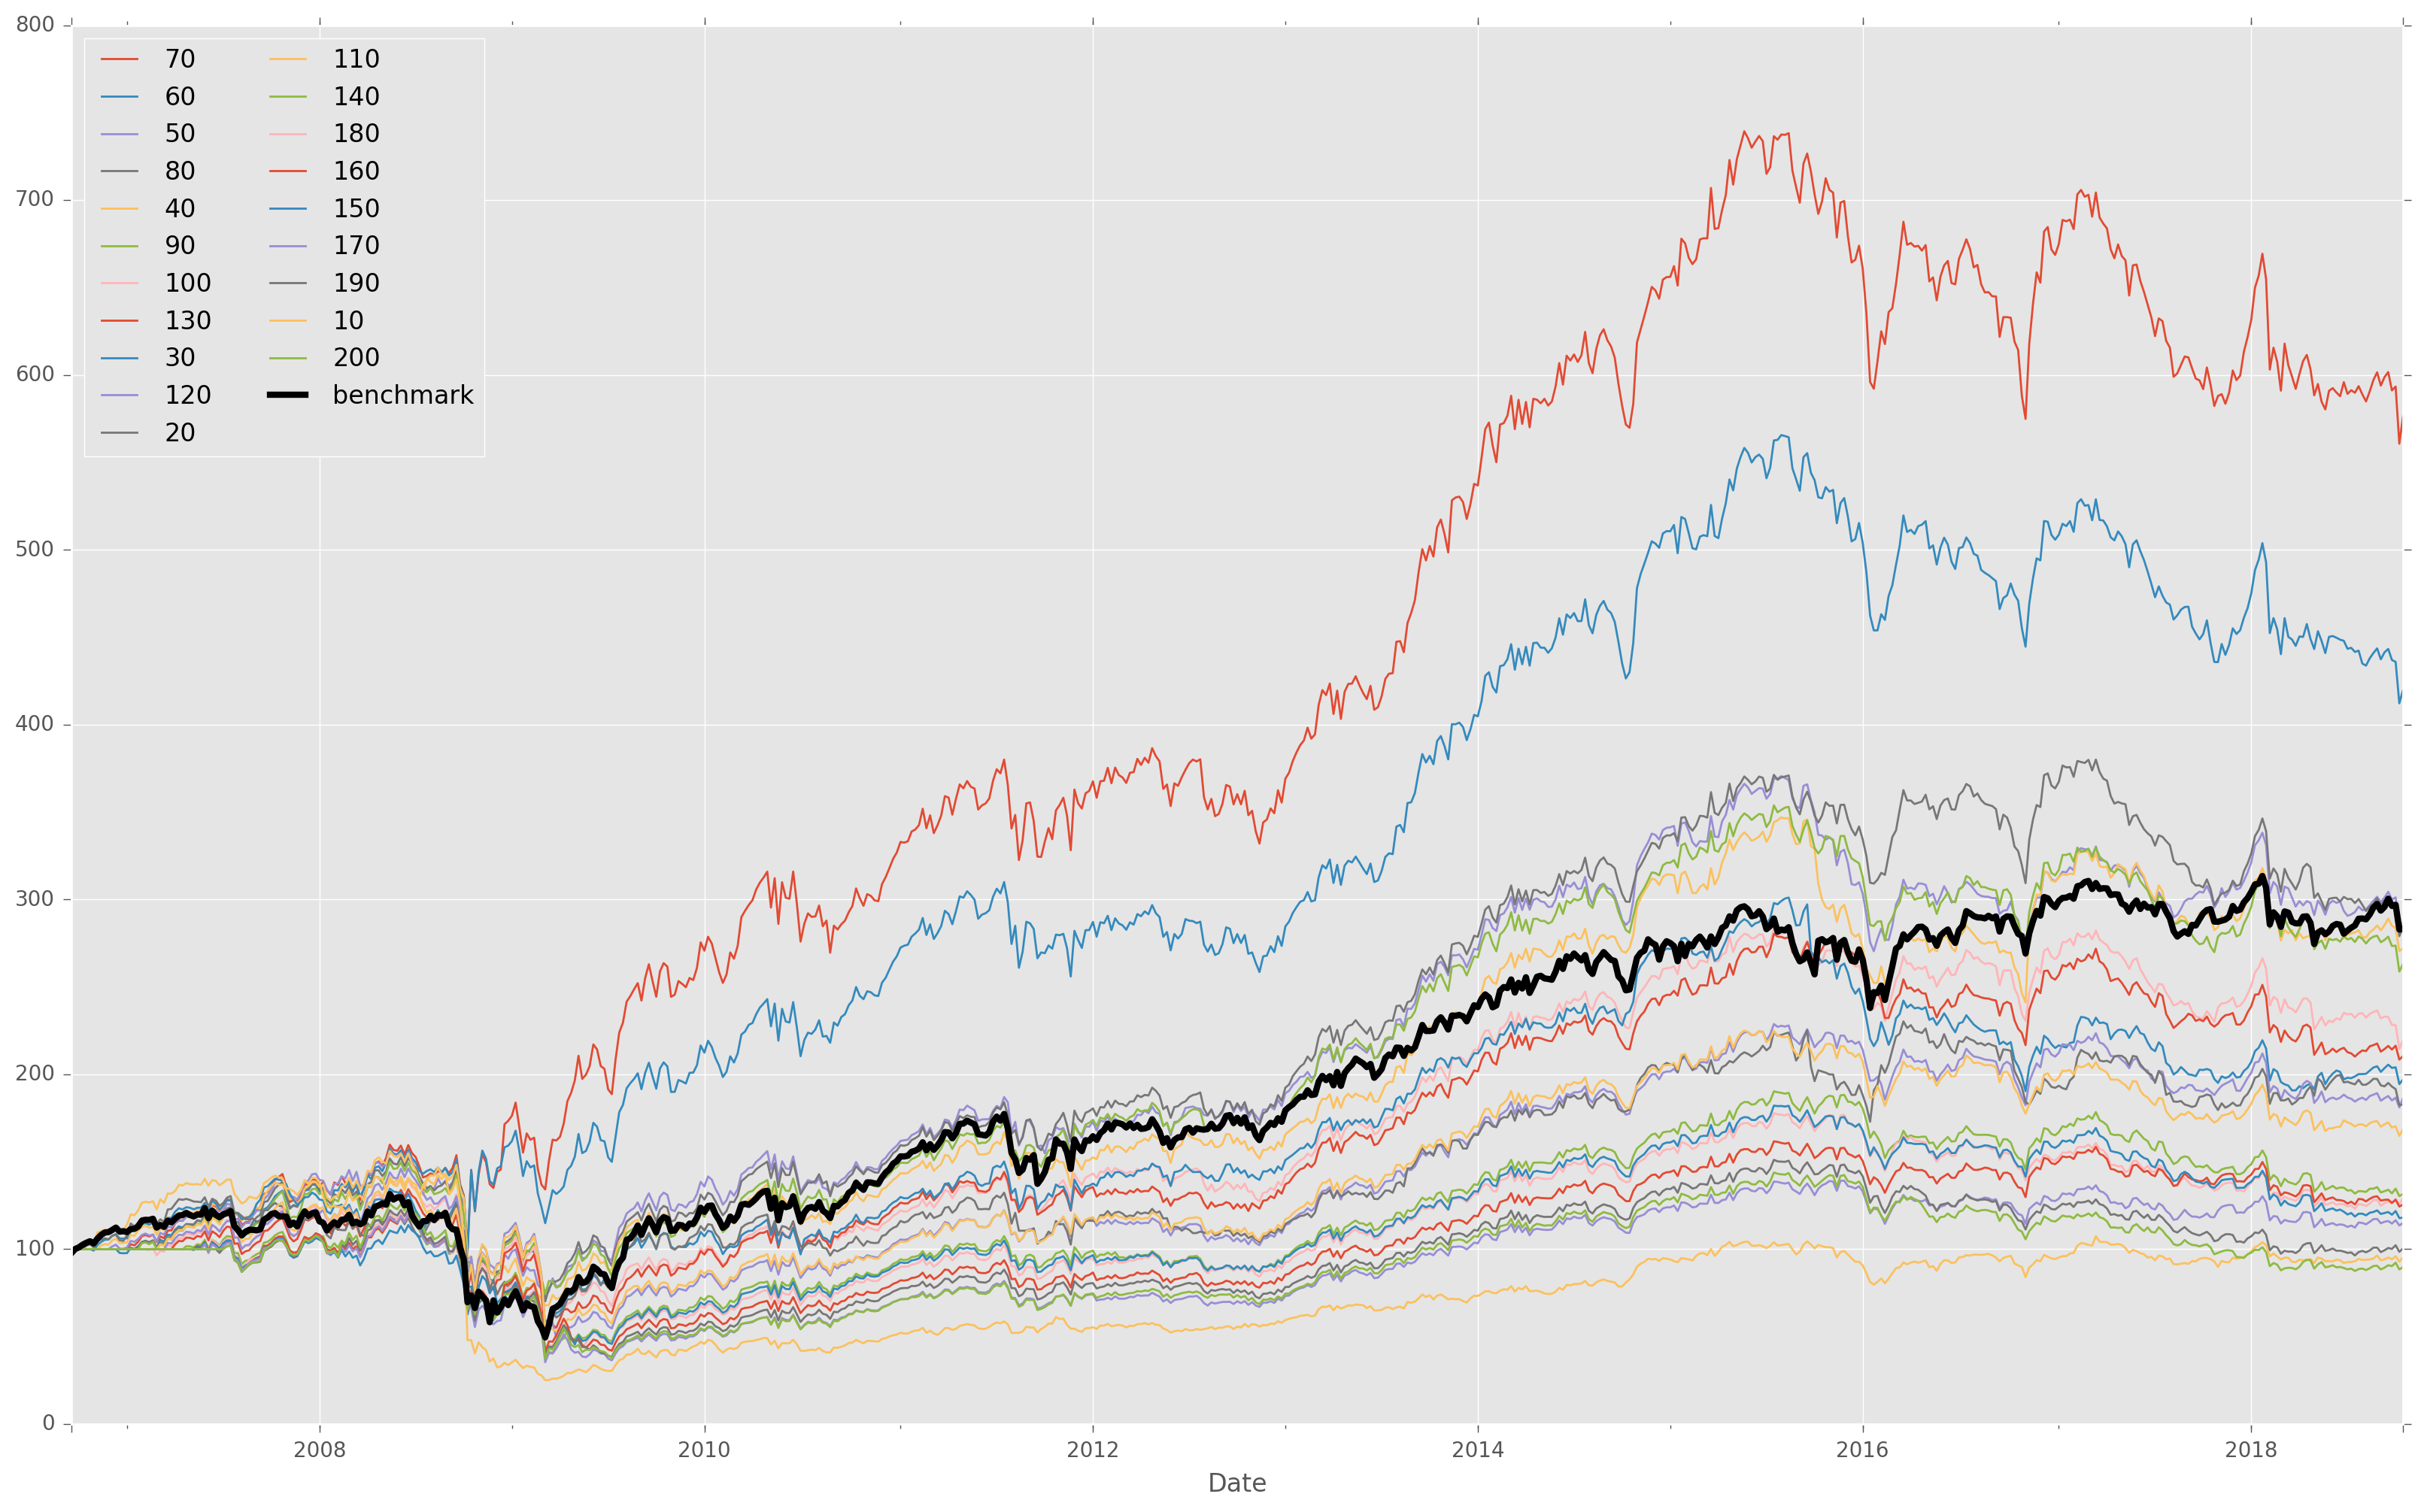

In [70]:
rango=range(10,201,10)
bt_returns = tools.grid_backtests(data, sharpe_strategy, [rango])

Por defecto la función nos muestra la gráfica de la equity de la estrategia para cada periodo. En negro punteado se muestra la equity del benchmark. En la leyenda los periodos aparecen ya ordenados de mayor a menor capital final, para facilitar la elección del parametro.

Como vemos entre 50 y 80 parecen estar los mejores resultados, así que usemos de nuevo la función **grid_backtests** para una granulidad mas fina en ese intervalo.

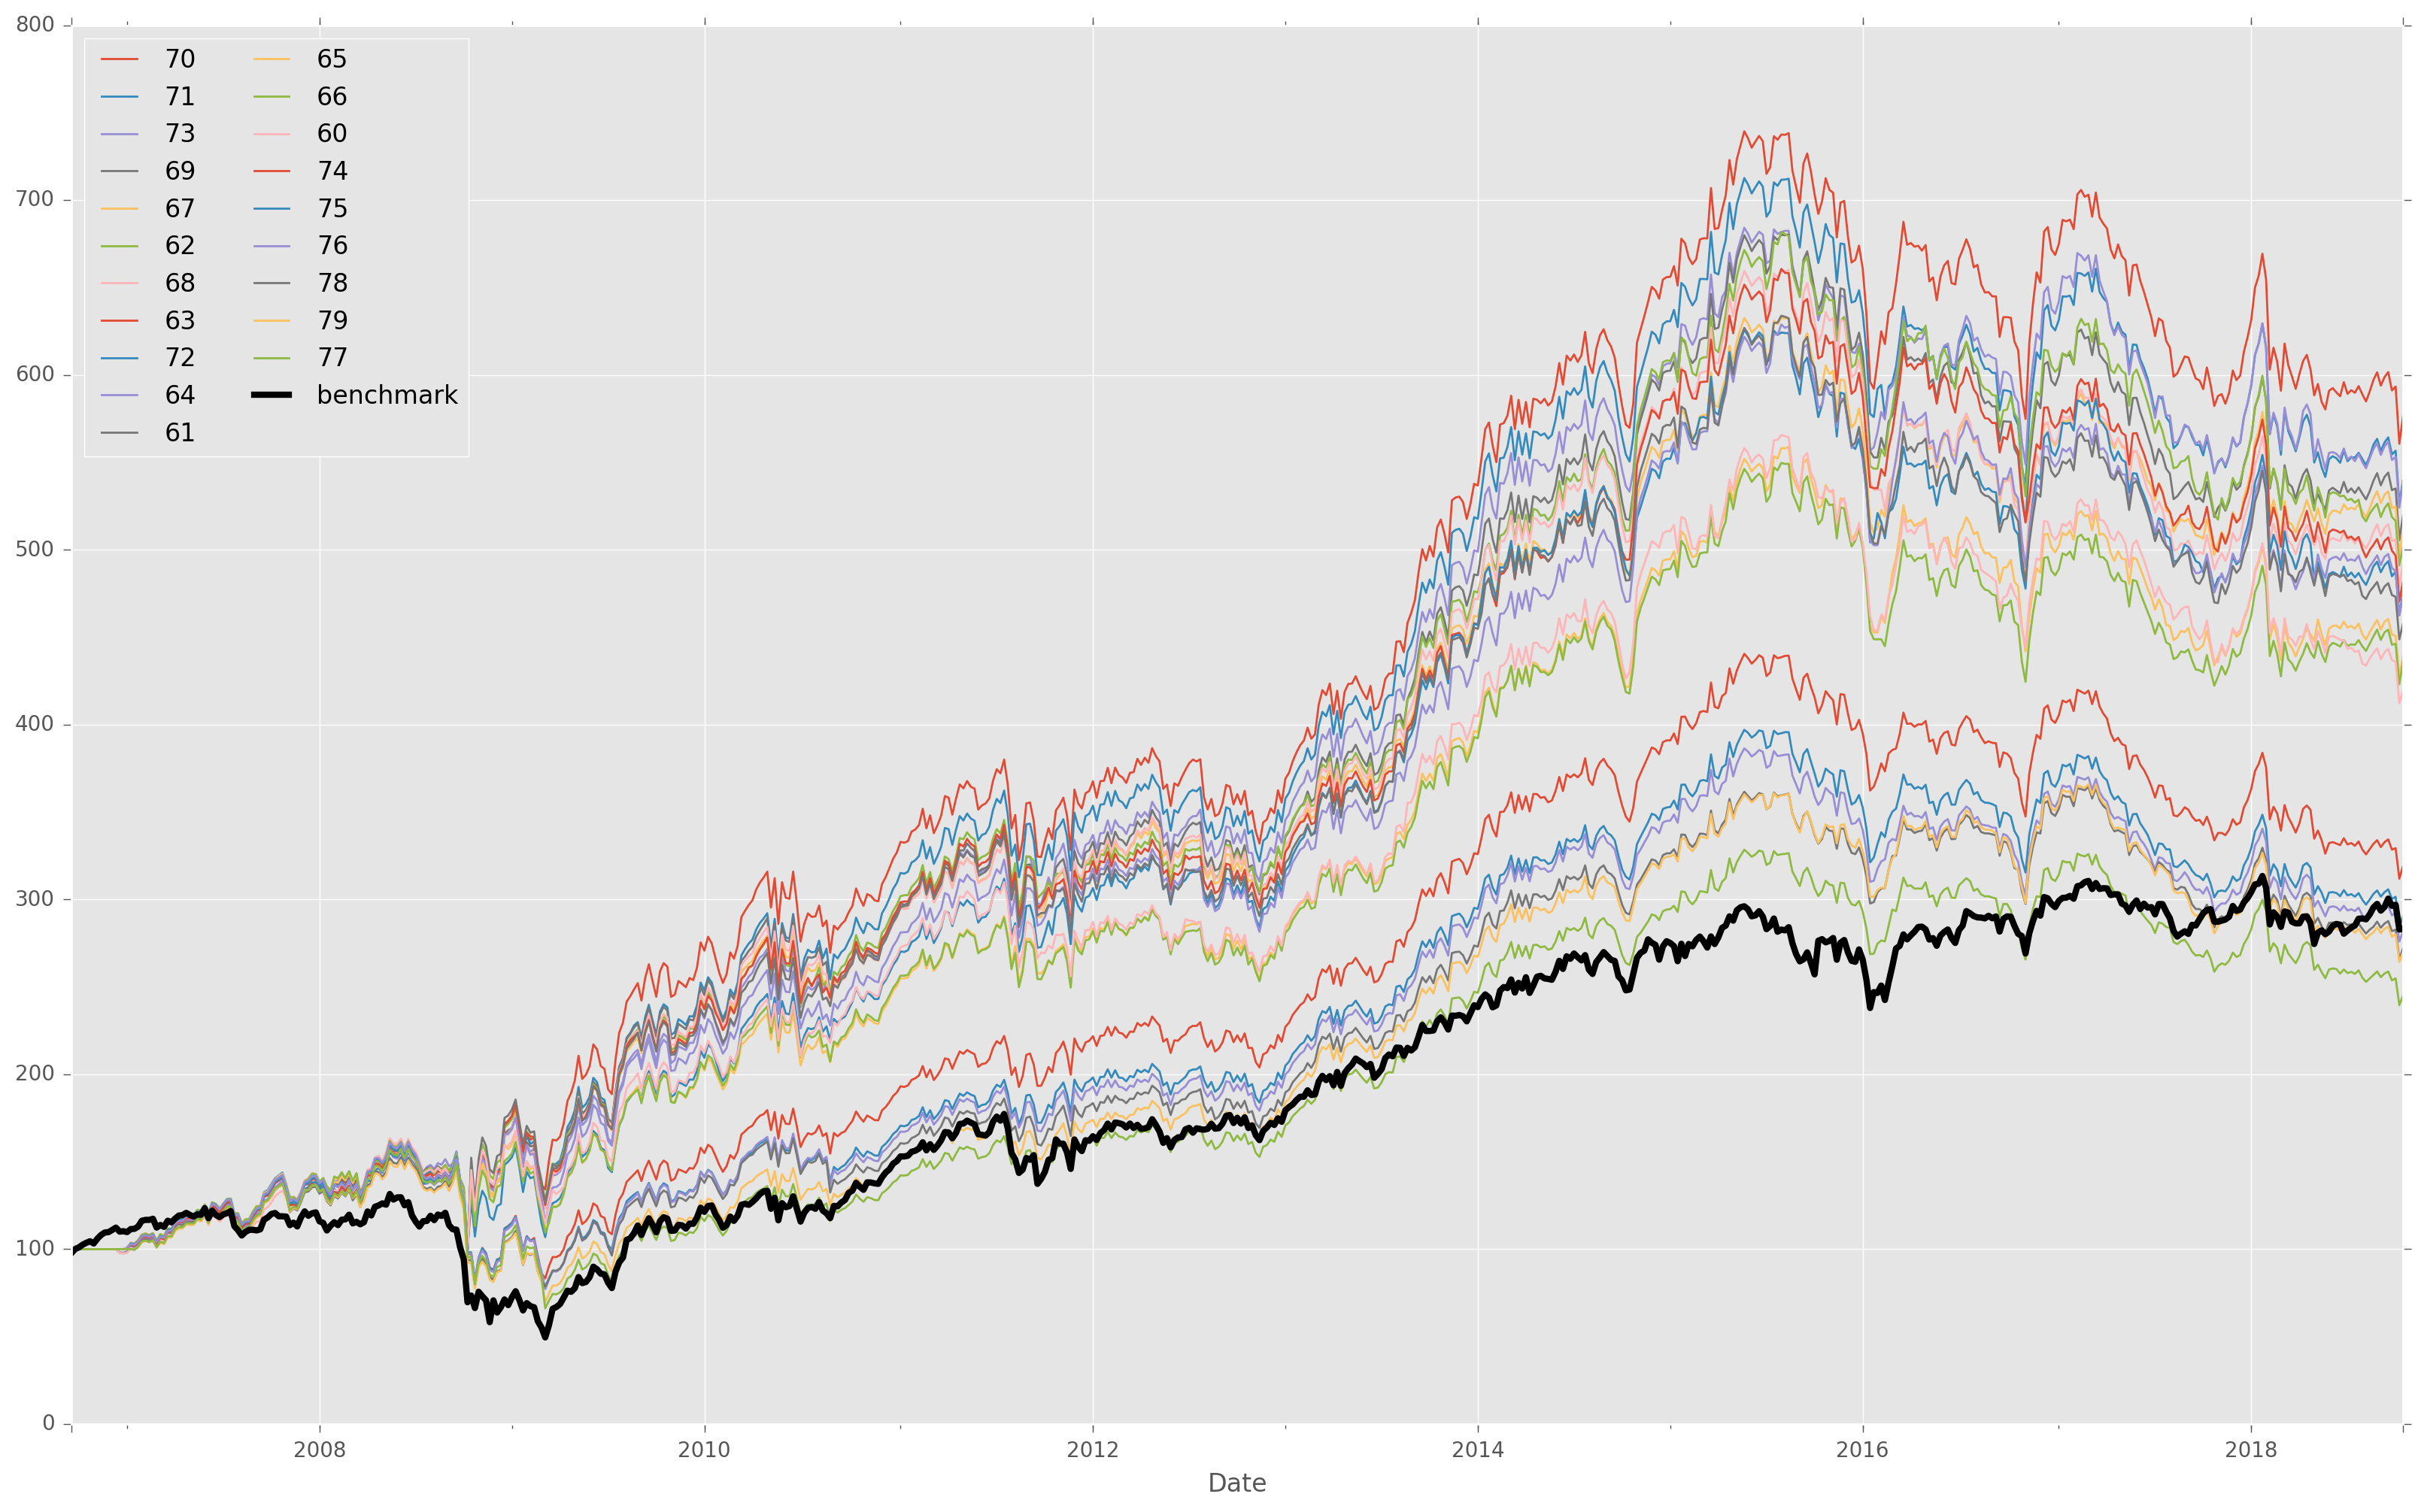

In [74]:
rango=range(60,80,1)
bt_returns = tools.grid_backtests(data, sharpe_strategy, [rango])

Tambien podemos usar los retornos devueltos para calcular los indices que nos puedan interesar. Como por ejemplo el Sharpe anualizado de la estrategia para cada periodo.

Antes pasaremos los retornos lineales de los distintos activos en las estrategias, a una serie de retornos logarítmicos para cada estrategia.

Podemos usar la función de pandas **describe**, para calcular media y varianza, junto con algunos otros datos de cada estrategia. Lo ordenamos por la media para compararlos.

In [75]:
bt_logreturns = bt_returns.portfolio_logreturn()

In [77]:
basic_stats = bt_logreturns.describe().sort_values('mean', axis=1, ascending=False).T
basic_stats

count      mean       std       min       25%       50%       75%  \
70  631.0  0.002776  0.035751 -0.278694 -0.011447  0.002609  0.018836   
71  631.0  0.002673  0.035747 -0.277616 -0.011470  0.003043  0.018791   
73  631.0  0.002671  0.034579 -0.263240 -0.011253  0.002394  0.019001   
69  631.0  0.002612  0.035093 -0.277153 -0.011757  0.002888  0.018722   
67  631.0  0.002588  0.034298 -0.276449 -0.010997  0.002545  0.018451   
62  631.0  0.002557  0.035389 -0.284135 -0.011900  0.002125  0.017859   
68  631.0  0.002529  0.034675 -0.279149 -0.011113  0.002807  0.018420   
63  631.0  0.002492  0.035606 -0.285863 -0.011750  0.002062  0.018549   
72  631.0  0.002470  0.033631 -0.271153 -0.012033  0.003082  0.018899   
64  631.0  0.002467  0.034754 -0.285239 -0.011138  0.002266  0.018674   
61  631.0  0.002411  0.036037 -0.282681 -0.011601  0.002095  0.018112   
65  631.0  0.002346  0.034239 -0.284584 -0.011117  0.002435  0.018473   
66  631.0  0.002333  0.033575 -0.282392 -0.011611  0.001903  0.018405   
60  631.0  0.002274  0.035250 -0.286145 -0.012170  0.001687  0.018183   
74  631.0  0.001840  0.032067 -0.276584 -0.011820  0.002435  0.018896   
75  631.0  0.001690  0.032275 -0.274122 -0.011486  0.002375  0.018674   
76  631.0  0.001641  0.032339 -0.277728 -0.012306  0.002536  0.018519   
78  631.0  0.001586  0.032128 -0.284713 -0.011309  0.002095  0.018492   
79  631.0  0.001574  0.032526 -0.285043 -0.011064  0.002385  0.018782   
77  631.0  0.001421  0.033315 -0.282399 -0.011293  0.002111  0.018699   

         max  
70  0.384273  
71  0.382411  
73  0.346473  
69  0.333688  
67  0.316128  
62  0.404534  
68  0.327921  
63  0.392541  
72  0.254741  
64  0.332852  
61  0.433842  
65  0.321459  
66  0.284938  
60  0.396832  
74  0.163637  
75  0.163637  
76  0.163637  
78  0.163637  
79  0.163637  
77  0.163637

In [79]:
bt_sharpe = np.sqrt(52) * basic_stats['mean'] / basic_stats['std']
bt_sharpe.sort_values(ascending=False).to_frame('Sharpe')

Sharpe
70  0.559953
73  0.557048
67  0.544215
71  0.539145
69  0.536711
72  0.529688
68  0.525886
62  0.520952
64  0.511927
63  0.504778
66  0.501149
65  0.494136
61  0.482424
60  0.465136
74  0.413665
75  0.377672
76  0.365999
78  0.355991
79  0.349067
77  0.307598

Vemos que el periodo que mejor resultado parece dar es el de 70 barras, aunque con un Sharpe inferior a uno.

In [81]:
benchmark_returns = np.log(data.weekly_returns().mean(axis=1).add(1))

In [83]:
bt_IR = bt_logreturns.information_ratio(benchmark_returns).sort_values(ascending=False).to_frame('IR').T
bt_IR.T

IR
70  0.046880
73  0.044104
71  0.043478
69  0.041856
67  0.041828
68  0.038500
72  0.038468
62  0.037916
64  0.036332
63  0.035328
66  0.031414
61  0.031057
65  0.030984
60  0.026409
74  0.009409
75  0.002025
76 -0.000431
78 -0.003165
79 -0.003831
77 -0.011099

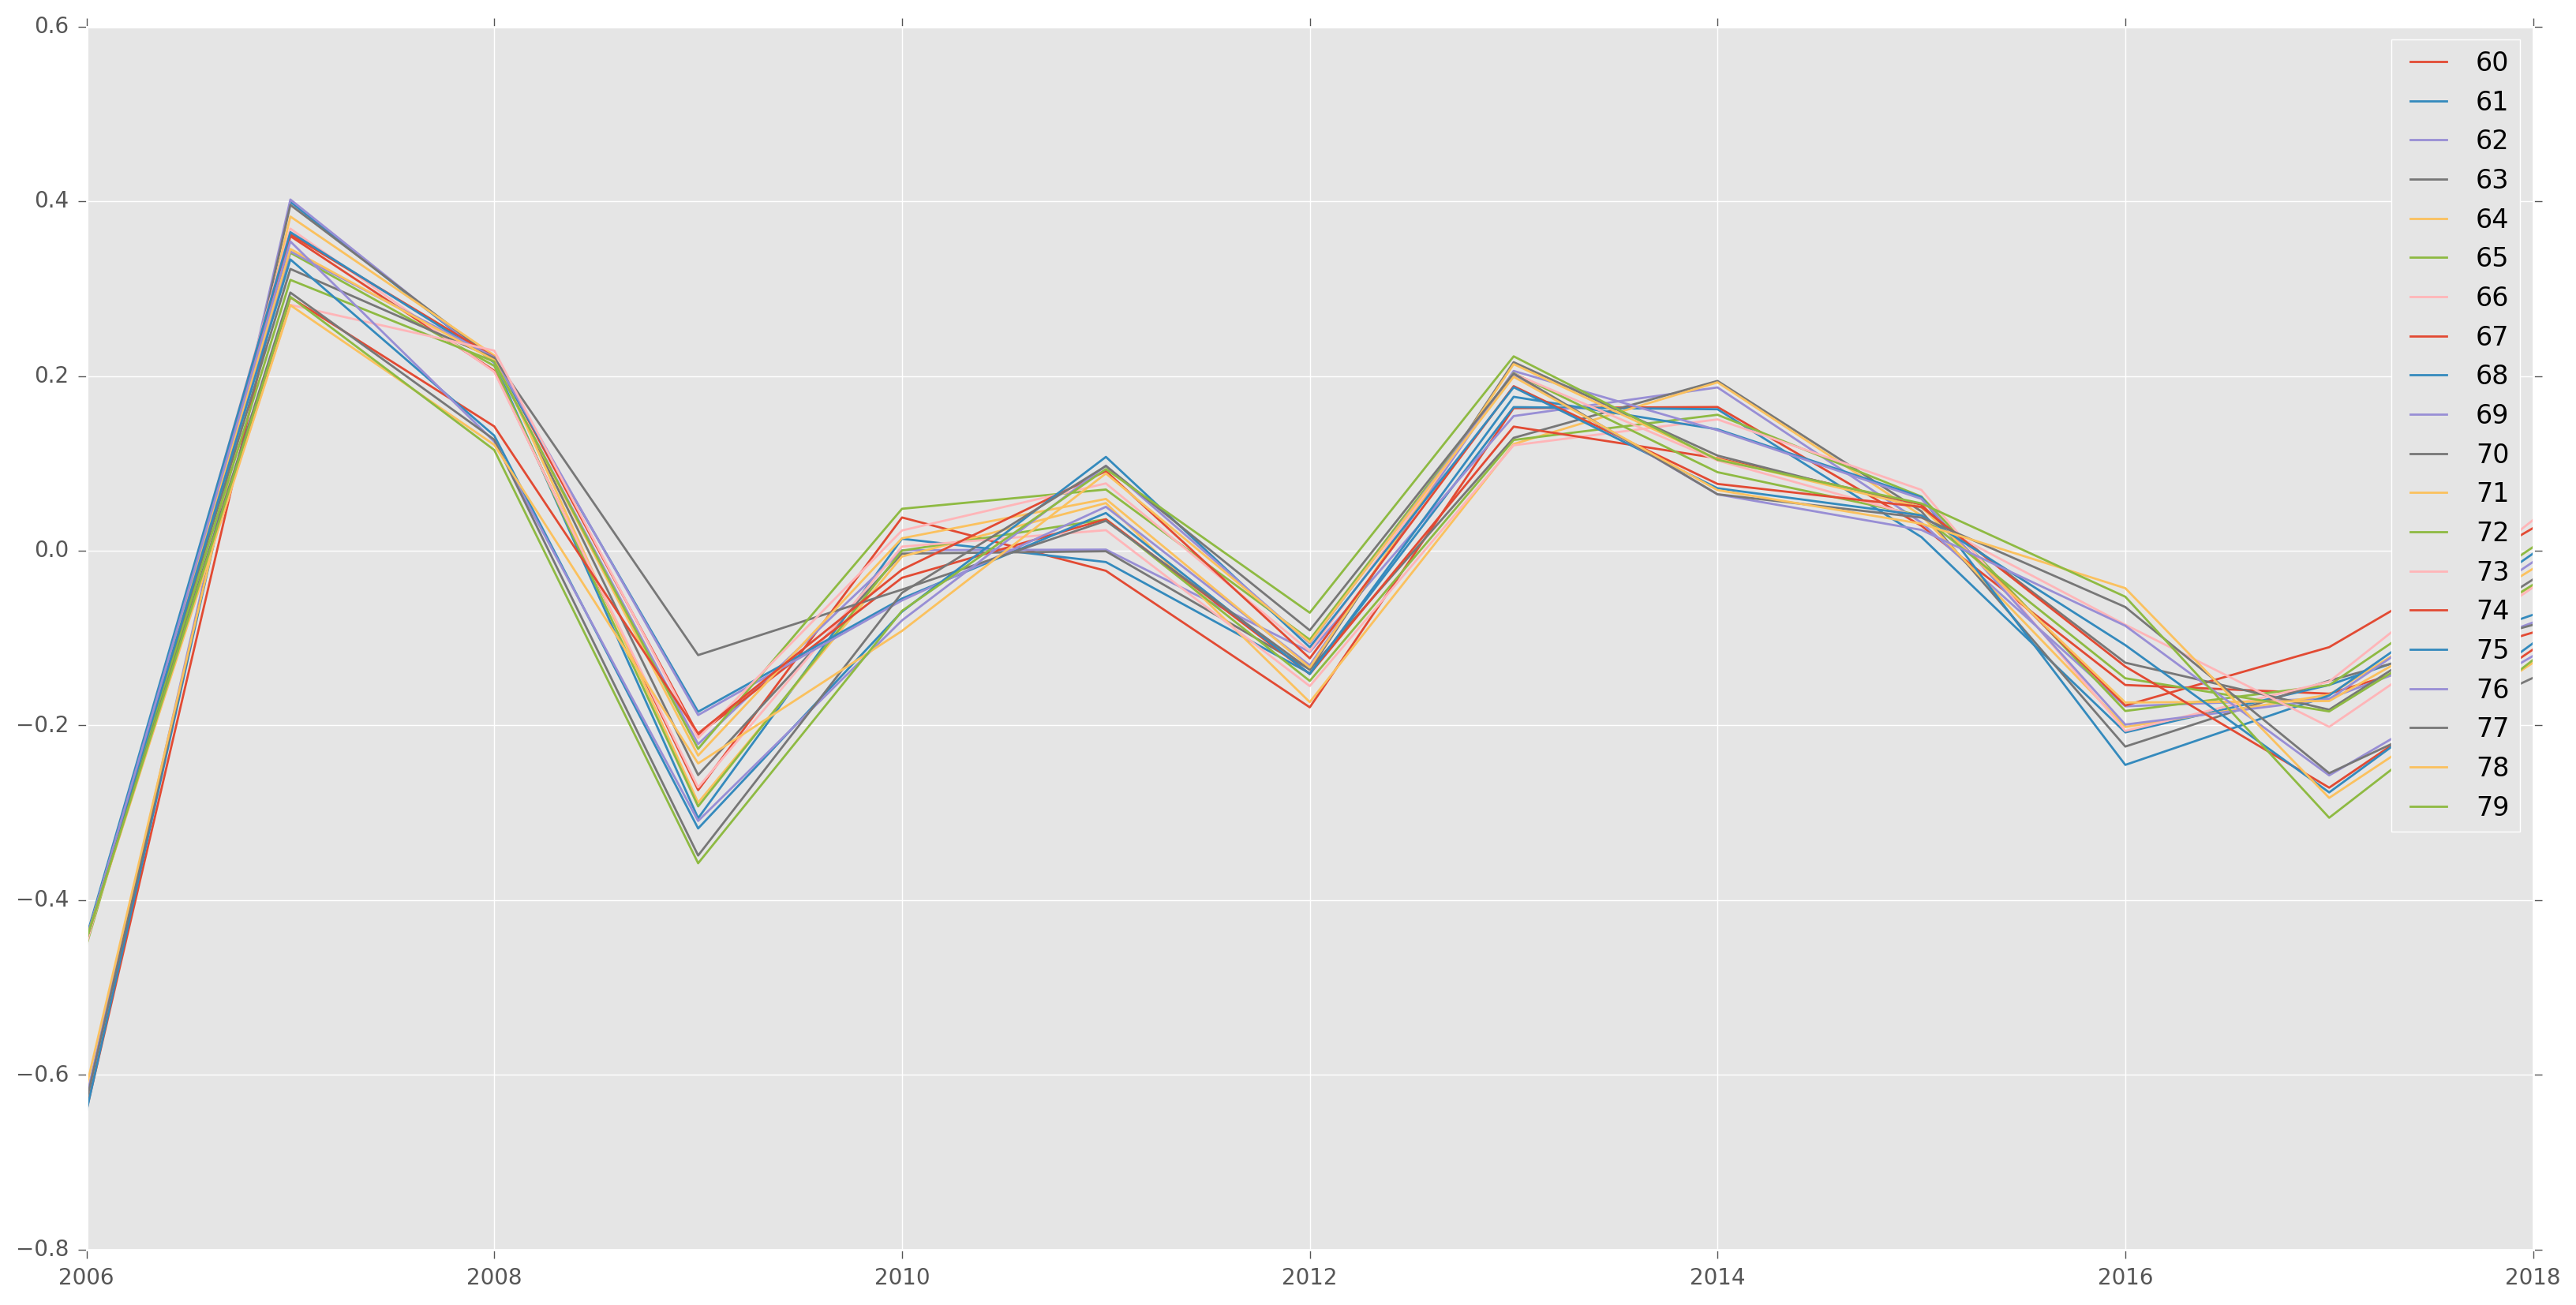

In [86]:
bt_logreturns.IR_by_year(benchmark_returns).plot()
# plt.legend(ncol=3)

La función **betas** de *pyratpack_tools* nos permite calcular la beta de cada estrategia respecto al benchmarck.

In [88]:
betas = bt_logreturns.betas(benchmark_returns)
betas.sort_values(ascending=False).to_frame('Betas')

Betas
71  0.817497
69  0.808197
64  0.807537
70  0.807207
63  0.806345
61  0.806029
60  0.800055
77  0.799941
68  0.798567
62  0.798242
72  0.796322
67  0.794892
79  0.793261
65  0.792447
73  0.789018
66  0.786606
75  0.782410
76  0.781769
78  0.773518
74  0.772824

Podemos ademas ver la evolción anual de la beta de las estrategias usando la función **betas_by_year**.

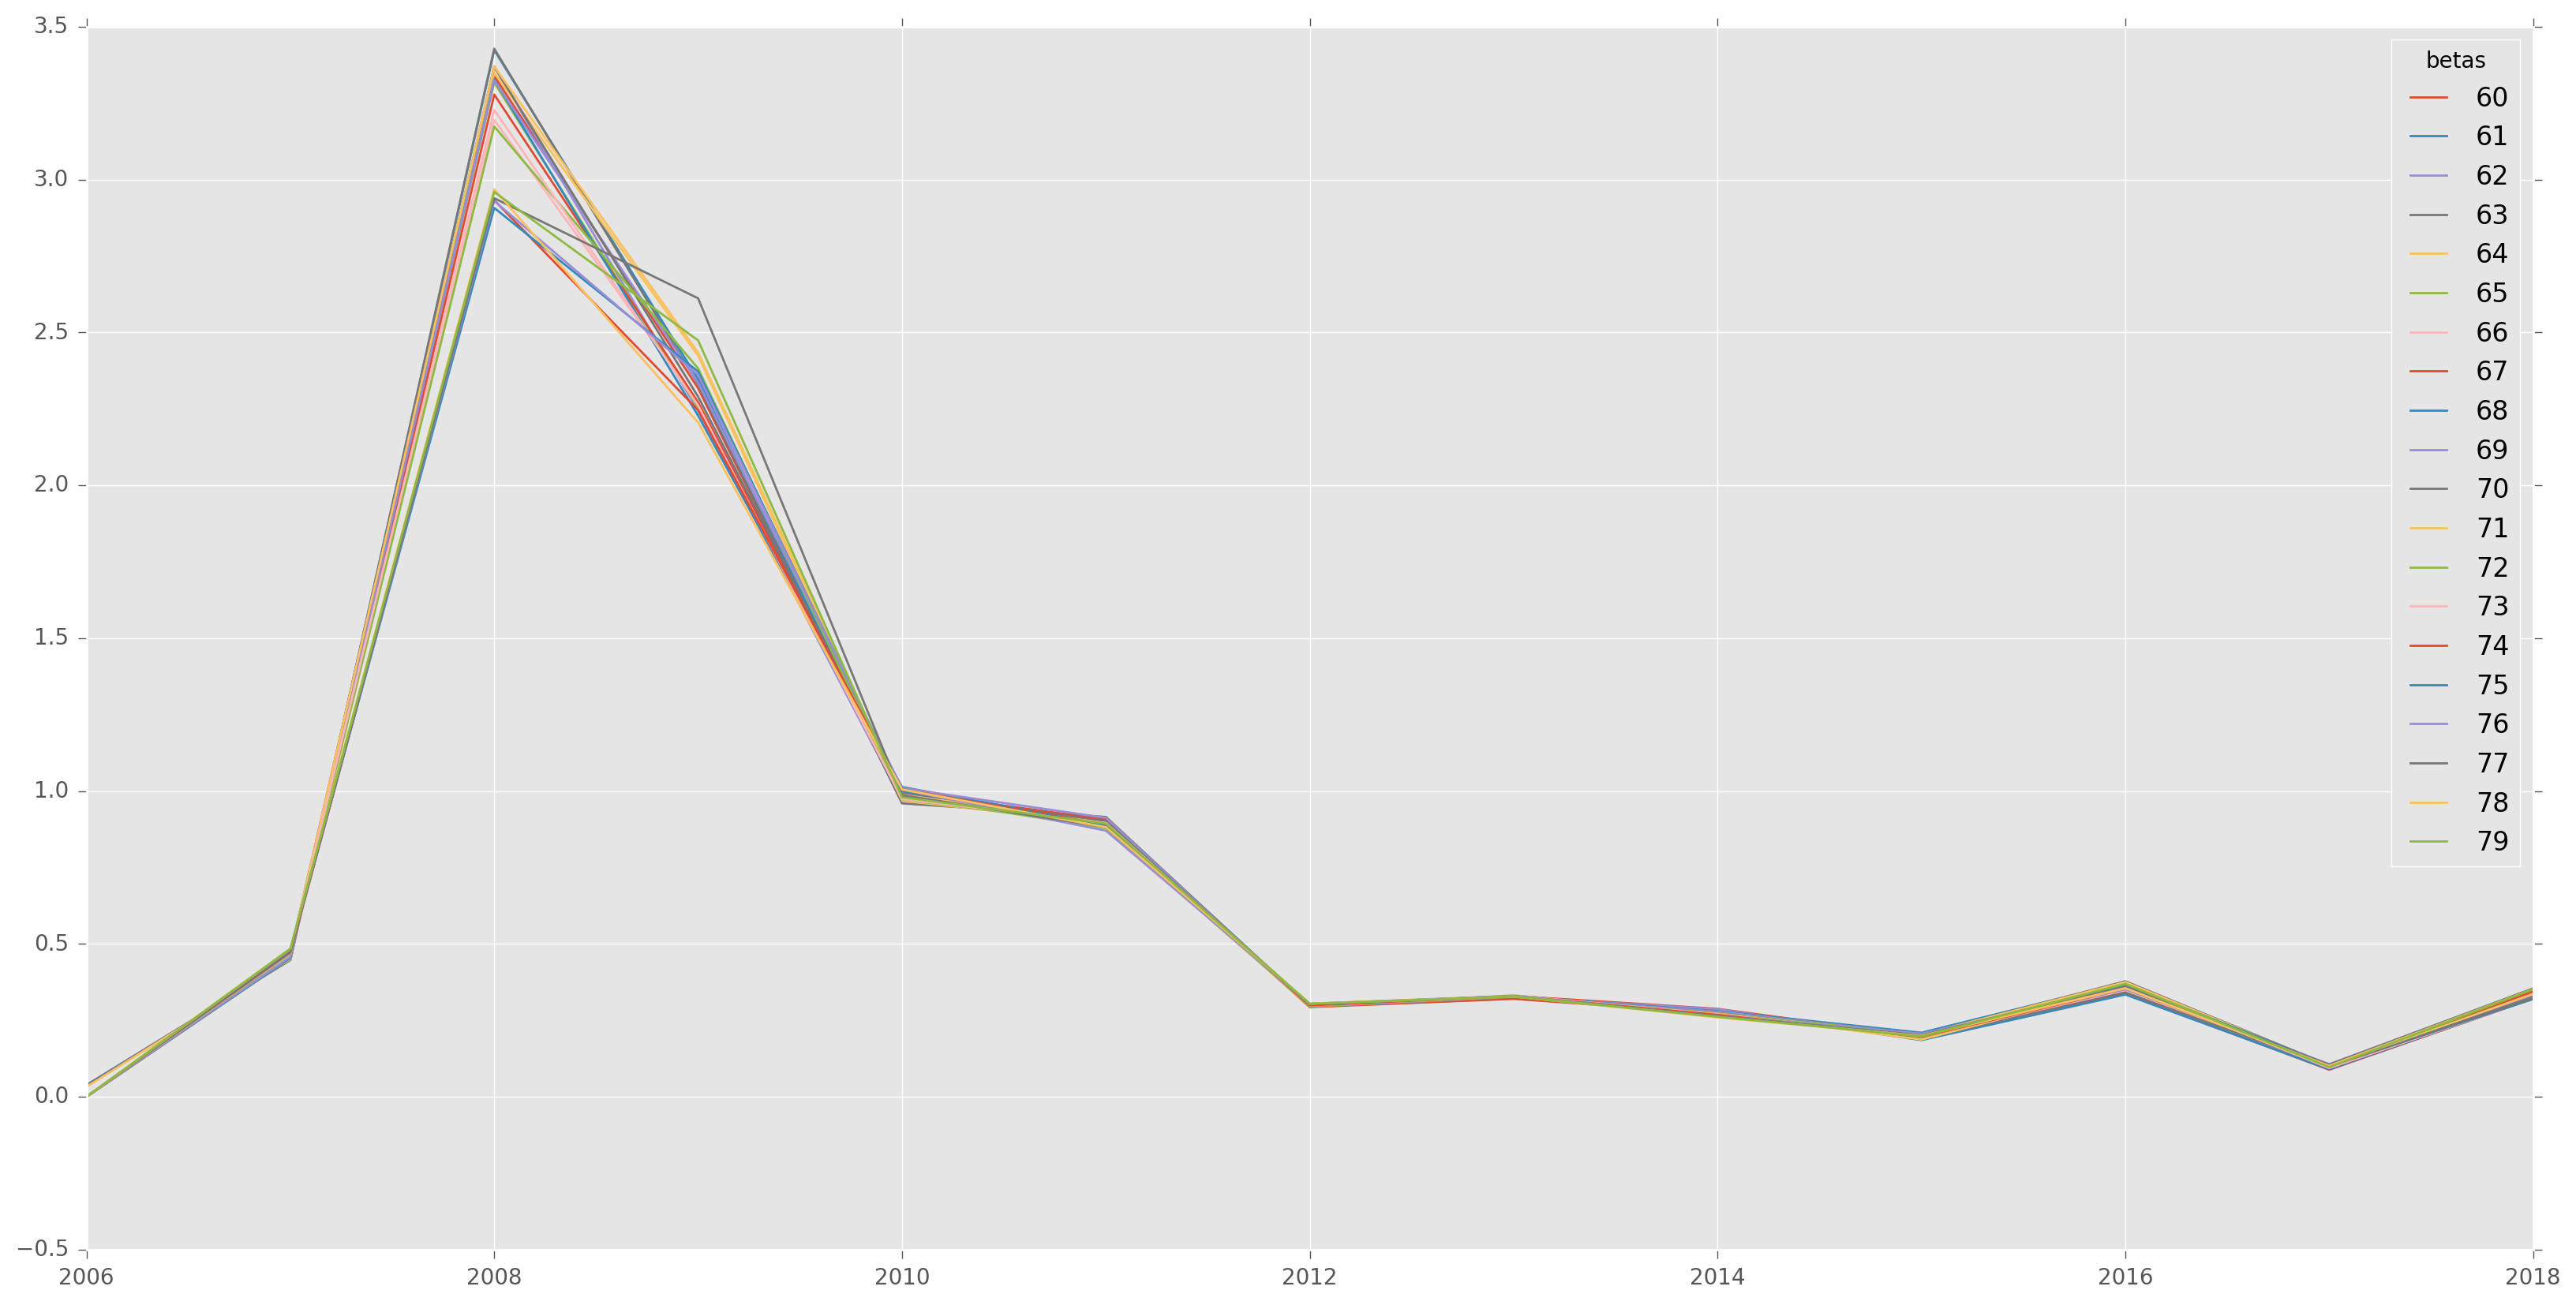

In [90]:
betas_yearly = bt_logreturns.betas_by_year(benchmark_returns) 
betas_yearly.plot(figsize=(20,10))

Tambien podemos calcular y graficar el drawdown de las simulaciones. Aunque la gráfica resultará un tanto confusa por la superposición de las lineas.

Usaremos antes la función de *pyratpack_tools* **portfolio_returns_to_prices** la cual nos devuelve el equity de cada estrategia. 

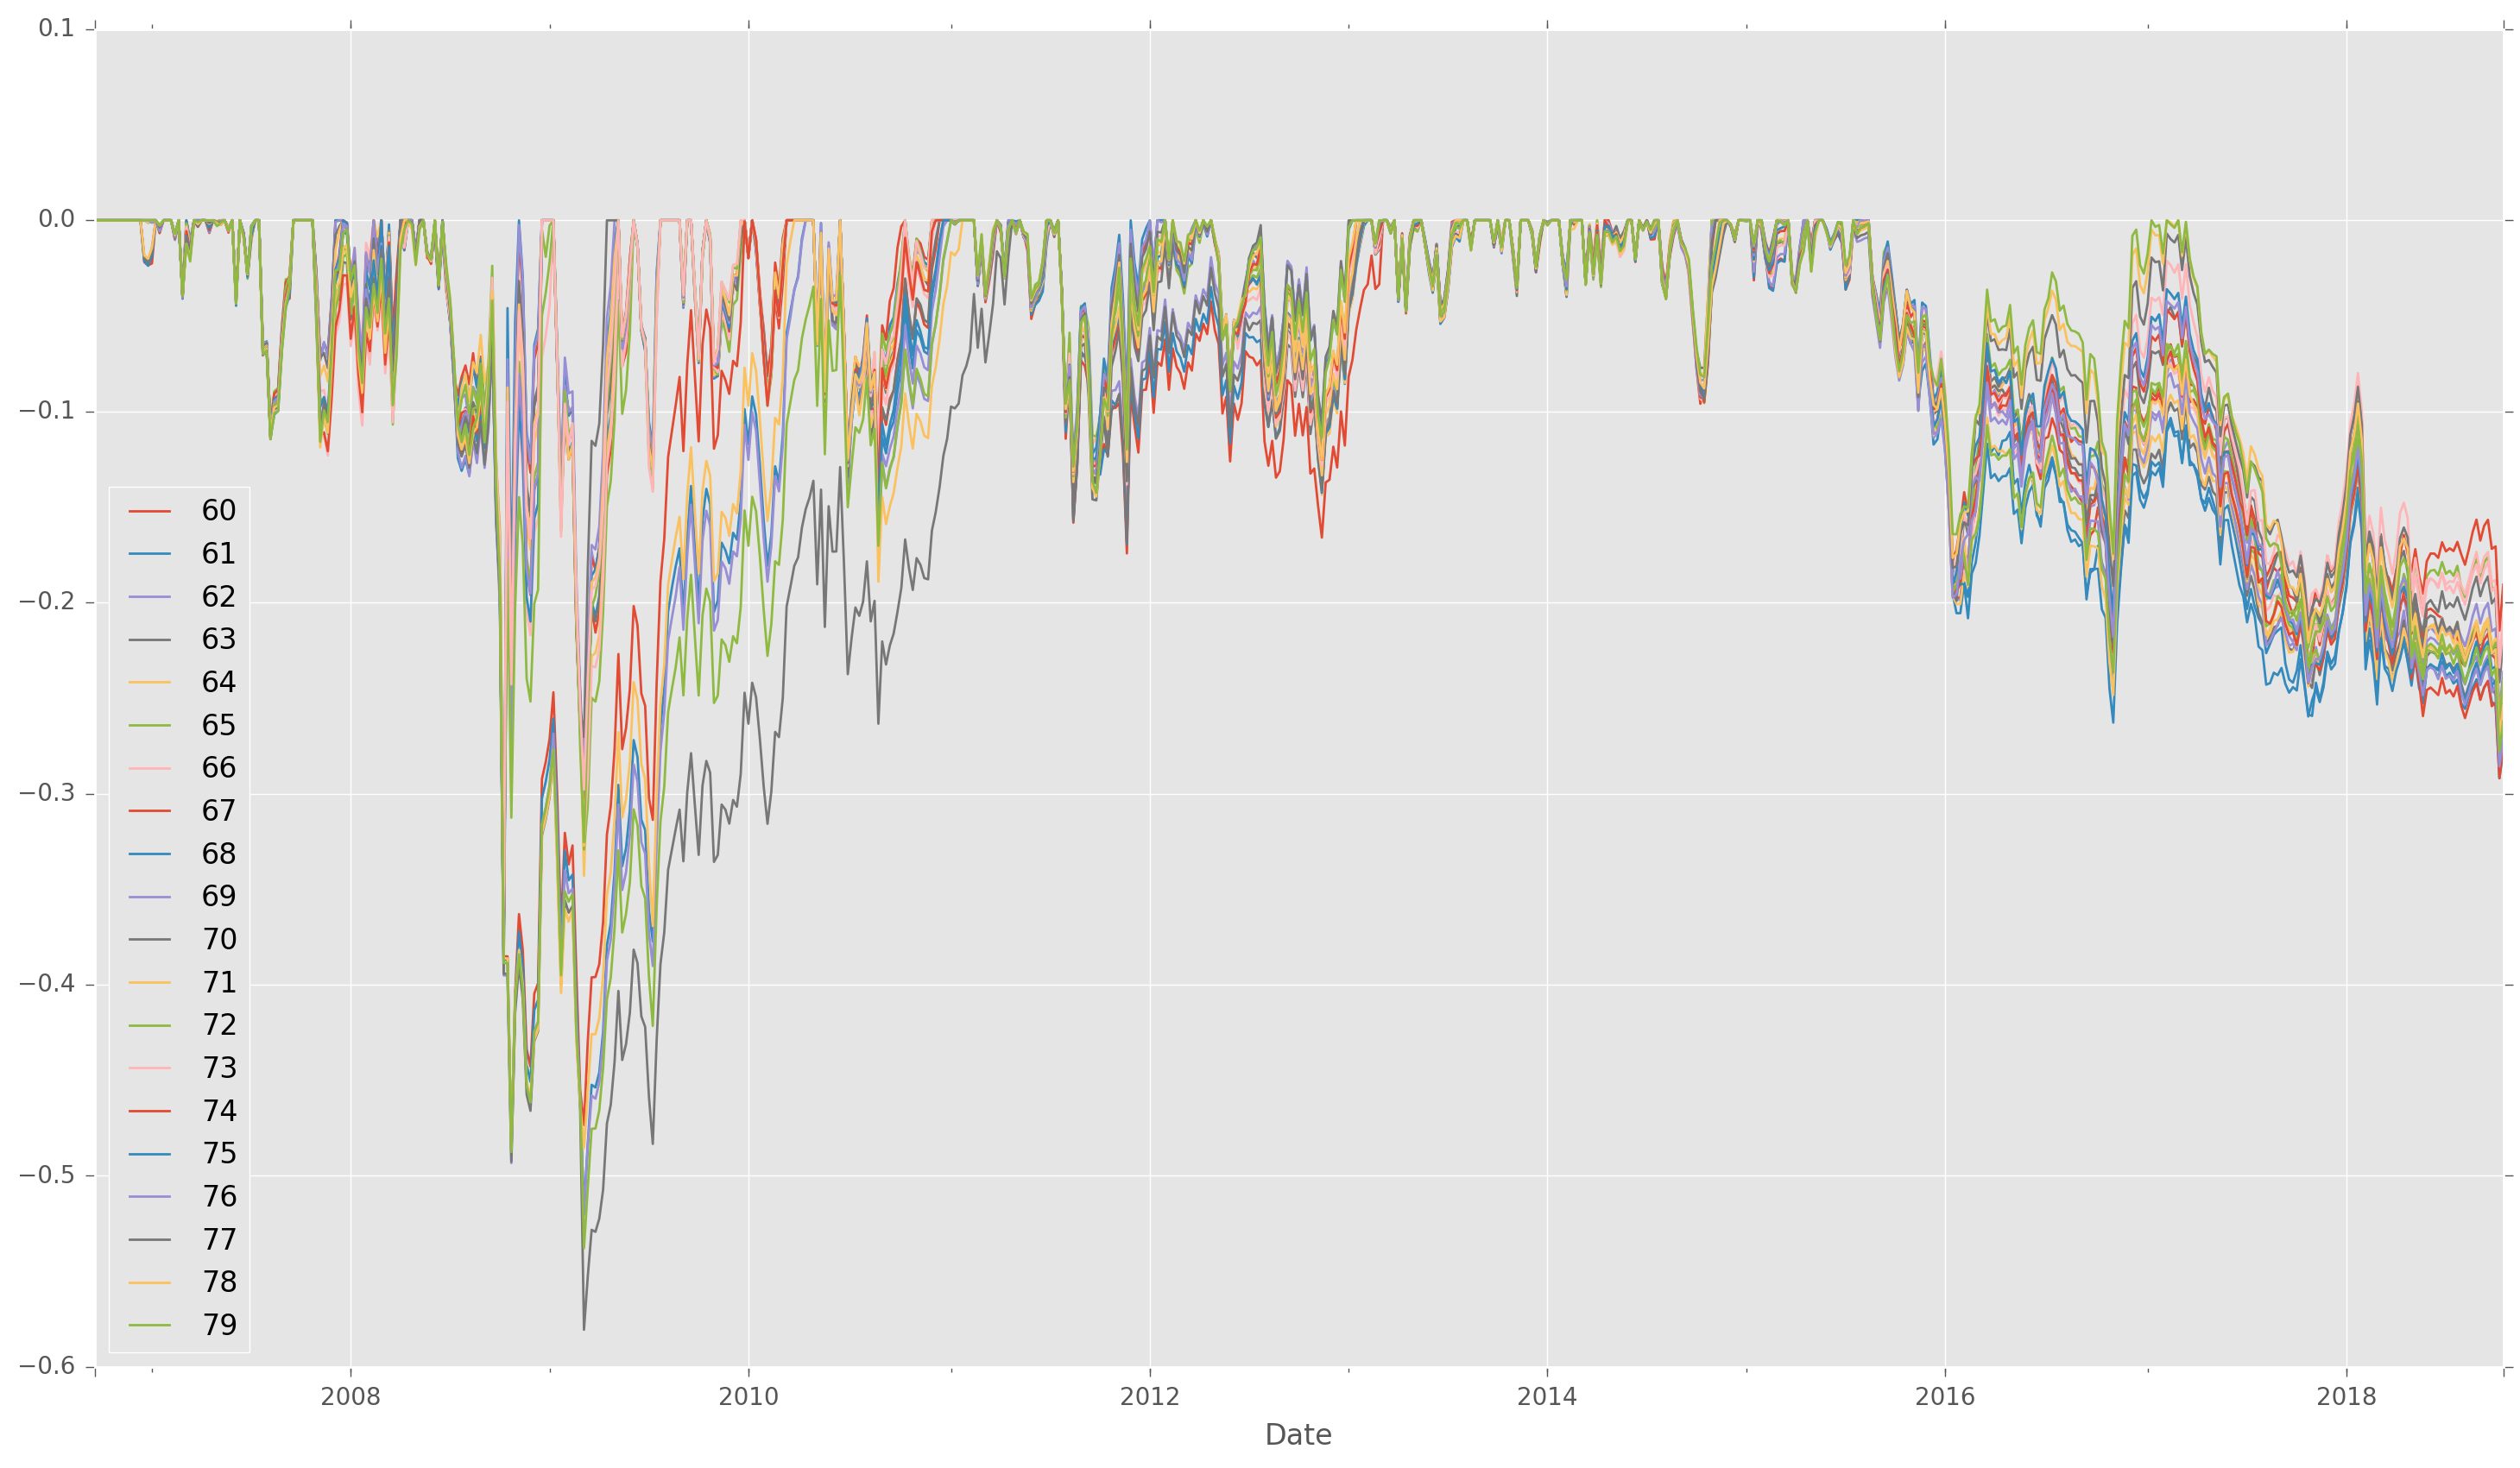

In [91]:
equities = bt_returns.portfolio_returns_to_prices()
bt_dd = (equities - equities.cummax())  / equities.cummax()

bt_dd.plot(figsize=(18,10))

Ordenamos según el drawdown máximo de las estrategias.

In [93]:
max_DD = bt_dd.min()
max_DD.sort_values(ascending=False).to_frame('Max DD')

Max DD
73 -0.359996
72 -0.363047
64 -0.368070
66 -0.372586
65 -0.374063
67 -0.375070
71 -0.377449
60 -0.380338
70 -0.380509
62 -0.381228
61 -0.381743
69 -0.382704
68 -0.390487
63 -0.391324
74 -0.485552
78 -0.485695
75 -0.517654
76 -0.520473
79 -0.537909
77 -0.580548

---

## Preparación de la estrategía para incluirla en la plantilla de PyRatPack

Una vez que tengamos definida y optimizada nuestra estrategia podemos resumirla y prepararla para incluirla en la plantilla de sistemas de PyRatpack, este archivo será el que finalmente se envirá para su inclusión en el proyecto y el que utilizará el meta-sistema cada semana para calcular los pesos de nuestro sistema.



In [94]:
period = 73
media = data.Close.pct_change().rolling(period).mean()
std = data.Close.pct_change().rolling(period).std()
sharpe = media / std
peso = sharpe.dropna().where(sharpe>0,0)

weights, returns = tools.to_pyratpack(data, peso, dropna=True, plot=False)

La función de nuestro sistema solo devolverá al meta, el último peso calculado.

In [95]:
weights.iloc[-1]

AES     0.159377
AIG     0.000000
ALK     0.012723
ARNC    0.162409
BXP     0.000000
COG     0.010921
EQR     0.000000
FE      0.055902
FLR     0.000000
GPC     0.150202
GT      0.000000
HP      0.023531
IBM     0.000000
INCY    0.000000
LEG     0.000000
MDLZ    0.000000
OXY     0.000000
SBUX    0.270332
UHS     0.154603
WU      0.000000
Name: 2018-10-19 00:00:00, dtype: float64

In [96]:
tools.check_weights(weights)

'Comprobacion Ok. Pesos aceptables.'

---

In [ ]:
pd.core.common.is_list_like = pd.api.types.is_list_like
import ffn